In [1]:
import neptune
import os
import matplotlib.pyplot as plt

API_TOKEN = os.environ.get("NEPTUNE_API_TOKEN")

'eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI3MzQyOWQ3MC03YjBlLTRhODgtYjIyMi1mMjVlYjM3ZGMzYjUifQ=='

[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/dstachow-put/non-canonical-pairs/e/NON-218
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/dstachow-put/non-canonical-pairs/e/NON-226
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/dstachow-put/non-canonical-pairs/e/NON-305


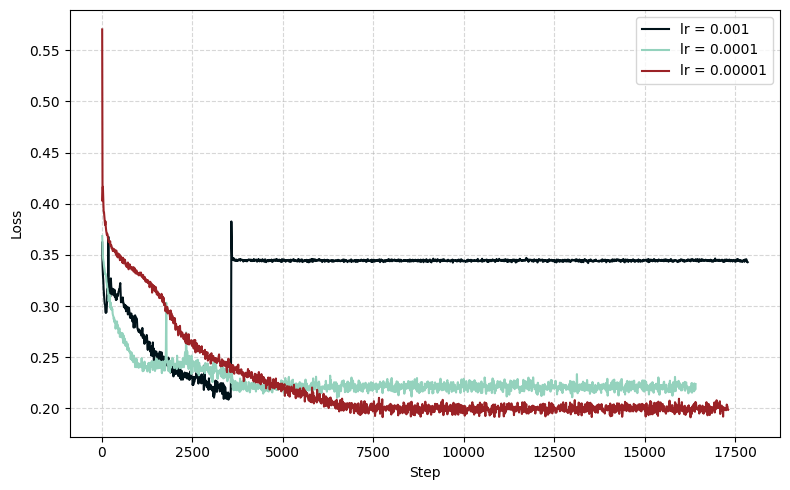

In [19]:
colors = ['#001219','#94d2bd','#9b2226']

run_ids = ['NON-218', 'NON-226', 'NON-305']
losses = ['lr = 0.001', 'lr = 0.0001', 'lr = 0.00001']


plt.figure(figsize=(8, 5))
for i, (run_id, loss) in enumerate(zip(run_ids, losses)):
    run = neptune.init_run(run_id, api_token=API_TOKEN, mode="read-only")

    train_loss = run["training/train_loss"].fetch_values(progress_bar=False)
    plt.plot(train_loss["step"], train_loss["value"], label=loss, color=colors[i])

plt.xlabel("Step")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("lr_comparison.png", dpi=300)
plt.show()